In [ ]:
#!pip install odfpy;
#!pip install basedosdados;
#!pip install google-resumable-media
#!pip install --upgrade googleapis-common-protos
#!pip install plotly_express

In [ ]:
# importing libraries:
import numpy as np
import pandas as pd

import basedosdados as bd

# data visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px # bubble chart

from google.colab import drive

In [ ]:
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
%ls -ltr '/gdrive/.shortcut-targets-by-id/1MNI7W_hrAxnm_EKmmeJI9LKcTUIegu2U/ASN.ROCKS/CNES'

total 22392
-rw------- 1 root root 22928848 Jul  2 12:31 bq-results-20220702-123105-1656765097865.csv


In [ ]:
drive_path = '/gdrive/.shortcut-targets-by-id/1MNI7W_hrAxnm_EKmmeJI9LKcTUIegu2U/ASN.ROCKS'

In [ ]:
def gera_df_pop():

    df_municipio = pd.read_excel(f'{drive_path}/datasets/planilhas_municipios/RELATORIO_DTB_BRASIL_MUNICIPIO.ods')

    df_populacao = pd.read_csv(f'{drive_path}/datasets/planilhas_populacao/populacao.csv')

    df = pd.merge(left=df_populacao, right=df_municipio, how='inner', left_on='id_municipio', right_on='Código Município Completo')

    cols = [
        'ano', 'id_municipio', 'Nome_Município', 'Nome_UF',
        'Nome Região Geográfica Intermediária', 'Nome Região Geográfica Imediata', 'Nome_Mesorregião', 'Nome_Microrregião',
        'sexo', 'grupo_idade', 'populacao'
    ]
    df = df[cols]

    df.columns = [
        'ano', 'id_municipio', 'nome_municipio', 'uf',
        'regiao_intermediaria', 'regiao_imediata', 'mesorregiao', 'microrregiao',
        'genero', 'grupo_idade', 'populacao'
    ]

    return df


def consolida_populacao_por_municipio(df):

    df_group = df.query("ano == 2021").groupby(by=['id_municipio', 'uf', 'regiao_intermediaria', 'regiao_imediata', 'mesorregiao', 'microrregiao', 'nome_municipio'], as_index=False).agg({
        'populacao': ['count', 'sum', 'mean', 'median', 'std']
    })

    df_group.columns = df_group.columns.droplevel(0)
    df_group.columns = ['id_municipio', 'uf', 'regiao_intermediaria', 'regiao_imediata', 'mesorregiao', 'microrregiao', 'nome_municipio', 'qtde', 'pop_total', 'pop_media', 'pop_mediana', 'pop_std']

    return df_group

def gera_df_beneficiarios():

    df_plano_saude = pd.read_csv(f'{drive_path}/sib_202203_MG.csv', sep=';', encoding='ISO-8859-1')

    df_beneficiarios = df_plano_saude.groupby(by=['CD_MUNICIPIO'], as_index=False).agg({
        'CD_OPERADORA': ['count', 'nunique'],
        'DT_INCLUSAO': ['nunique', 'min', 'max']
    })

    df_beneficiarios.columns = df_beneficiarios.columns.droplevel(0)
    df_beneficiarios.columns = ['id_municipio', 'qtde_beneficiarios', 'qtde_operadoras', 'qtde_datas', 'min_data', 'max_data']

    df_beneficiarios['id_municipio'] = df_beneficiarios['id_municipio'].astype(str)

    return df_beneficiarios


def gera_df_hospitais():

    df_hospitais = pd.read_csv(f'{drive_path}/CNES/bq-results-20220702-123105-1656765097865.csv')

    return df_hospitais

def junta_datasets(df_pop, df_beneficiarios):

    df_pop['id_municipio']

    return None

In [ ]:
df = gera_df_pop()
df.head()

,ano,id_municipio,nome_municipio,uf,regiao_intermediaria,regiao_imediata,mesorregiao,microrregiao,genero,grupo_idade,populacao
0,2000,1100015,Alta Floresta D'Oeste,Rondônia,Ji-Paraná,Cacoal,Leste Rondoniense,Cacoal,feminino,0-4 anos,1441
1,2000,1100015,Alta Floresta D'Oeste,Rondônia,Ji-Paraná,Cacoal,Leste Rondoniense,Cacoal,masculino,0-4 anos,1543
2,2000,1100015,Alta Floresta D'Oeste,Rondônia,Ji-Paraná,Cacoal,Leste Rondoniense,Cacoal,feminino,10-14 anos,1585
3,2000,1100015,Alta Floresta D'Oeste,Rondônia,Ji-Paraná,Cacoal,Leste Rondoniense,Cacoal,masculino,10-14 anos,1610
4,2000,1100015,Alta Floresta D'Oeste,Rondônia,Ji-Paraná,Cacoal,Leste Rondoniense,Cacoal,feminino,15-19 anos,1486


In [ ]:
df_pop = consolida_populacao_por_municipio(df)
df_pop.head()

,id_municipio,uf,regiao_intermediaria,regiao_imediata,mesorregiao,microrregiao,nome_municipio,qtde,pop_total,pop_media,pop_mediana,pop_std
0,1100015,Rondônia,Ji-Paraná,Cacoal,Leste Rondoniense,Cacoal,Alta Floresta D'Oeste,34,22516,662.235294,776.0,261.806204
1,1100023,Rondônia,Porto Velho,Ariquemes,Leste Rondoniense,Ariquemes,Ariquemes,34,111148,3269.058824,3999.5,1582.087553
2,1100031,Rondônia,Ji-Paraná,Vilhena,Leste Rondoniense,Colorado do Oeste,Cabixi,34,5067,149.029412,169.5,56.514672
3,1100049,Rondônia,Ji-Paraná,Cacoal,Leste Rondoniense,Cacoal,Cacoal,34,86416,2541.647059,2952.5,1065.283342
4,1100056,Rondônia,Ji-Paraná,Vilhena,Leste Rondoniense,Colorado do Oeste,Cerejeiras,34,16088,473.176471,540.0,186.194013


In [ ]:
df_beneficiarios = gera_df_beneficiarios()
df_beneficiarios.head()

,id_municipio,qtde_beneficiarios,qtde_operadoras,qtde_datas,min_data,max_data
0,310000,690,52,99,1999-10,2022-03
1,310010,2135,73,142,1999-12,2022-04
2,310020,4325,67,215,1999-10,2022-04
3,310030,1025,55,166,1999-11,2022-04
4,310040,437,29,83,1999-10,2022-04


In [ ]:
df_hospitais = gera_df_hospitais()
df_hospitais.head()

,ANO,MES,id_municipio,id_municipio_6,vinculo_sus,tipo_unidade,id_cnes,cpf_cnpj,cnpj_mantenedora,atendimento_internacao_particular,atendimento_amb_particular
0,2021,6,1200013,120001,1,70,153281,NaN,84306737000127,0,0
1,2021,6,1200013,120001,1,2,257184,NaN,84306737000127,0,0
2,2021,6,1200013,120001,1,4,258555,NaN,84306737000127,0,0
3,2021,6,1200013,120001,1,50,271438,NaN,84306737000127,0,0
4,2021,6,1200013,120001,1,84,282235,NaN,84306737000127,0,0


In [ ]:
df_hospitais['id_cnes'].value_counts(dropna=False)

200824     1
7967896    1
5936632    1
9979042    1
7363745    1
          ..
3438554    1
7106521    1
7104472    1
9183191    1
5244927    1
Name: id_cnes, Length: 351241, dtype: int64

In [ ]:
df_estabelecimentos = df_hospitais.groupby(by=['id_municipio_6'], as_index=False).agg({
    'id_cnes': ['count'],
    'tipo_unidade': ['nunique']
})

df_estabelecimentos.columns = df_estabelecimentos.columns.droplevel(0)
df_estabelecimentos.columns = ['id_municipio', 'qtde_estabelecimentos', 'qtde_tipos']
df_estabelecimentos['id_municipio'] = df_estabelecimentos['id_municipio'].astype(str)
df_estabelecimentos

,id_municipio,qtde_estabelecimentos,qtde_tipos
0,110001,36,13
1,110002,151,20
2,110003,11,9
3,110004,395,18
4,110005,25,11
...,...,...,...
5565,522200,16,9
5566,522205,13,9
5567,522220,6,5
5568,522230,5,4


In [ ]:
df_hospitais['id_municipio_6'].value_counts(dropna=False)

355030    13544
330455     8258
410690     6730
230440     6309
310620     5631
          ...  
430223        2
314370        1
311990        1
311850        1
313280        1
Name: id_municipio_6, Length: 5570, dtype: int64

In [ ]:
df_beneficiarios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 854 entries, 0 to 853
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_municipio        854 non-null    object
 1   qtde_beneficiarios  854 non-null    int64 
 2   qtde_operadoras     854 non-null    int64 
 3   qtde_datas          854 non-null    int64 
 4   min_data            854 non-null    object
 5   max_data            854 non-null    object
dtypes: int64(3), object(3)
memory usage: 46.7+ KB


In [ ]:
df_pop['id_municipio'] = df_pop['id_municipio'].apply(lambda x: str(x)[0:6])

df_merge = pd.merge(left=df_pop, right=df_beneficiarios, how='left', on='id_municipio', indicator=True)
df_merge

,id_municipio,uf,regiao_intermediaria,regiao_imediata,mesorregiao,microrregiao,nome_municipio,qtde,pop_total,pop_media,pop_mediana,pop_std,qtde_beneficiarios,qtde_operadoras,qtde_datas,min_data,max_data,_merge
0,110001,Rondônia,Ji-Paraná,Cacoal,Leste Rondoniense,Cacoal,Alta Floresta D'Oeste,34,22516,662.235294,776.0,261.806204,NaN,NaN,NaN,NaN,NaN,left_only
1,110002,Rondônia,Porto Velho,Ariquemes,Leste Rondoniense,Ariquemes,Ariquemes,34,111148,3269.058824,3999.5,1582.087553,NaN,NaN,NaN,NaN,NaN,left_only
2,110003,Rondônia,Ji-Paraná,Vilhena,Leste Rondoniense,Colorado do Oeste,Cabixi,34,5067,149.029412,169.5,56.514672,NaN,NaN,NaN,NaN,NaN,left_only
3,110004,Rondônia,Ji-Paraná,Cacoal,Leste Rondoniense,Cacoal,Cacoal,34,86416,2541.647059,2952.5,1065.283342,NaN,NaN,NaN,NaN,NaN,left_only
4,110005,Rondônia,Ji-Paraná,Vilhena,Leste Rondoniense,Colorado do Oeste,Cerejeiras,34,16088,473.176471,540.0,186.194013,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,522200,Goiás,Goiânia,Anápolis,Sul Goiano,Pires do Rio,Vianópolis,34,14088,414.352941,474.5,157.153251,NaN,NaN,NaN,NaN,NaN,left_only
5566,522205,Goiás,Itumbiara,Piracanjuba,Sul Goiano,Meia Ponte,Vicentinópolis,34,9002,264.764706,317.5,119.556265,NaN,NaN,NaN,NaN,NaN,left_only
5567,522220,Goiás,Luziânia - Águas Lindas de Goiás,Flores de Goiás,Leste Goiano,Entorno de Brasília,Vila Boa,34,6451,189.735294,210.5,118.779222,NaN,NaN,NaN,NaN,NaN,left_only
5568,522230,Goiás,Porangatu - Uruaçu,Ceres - Rialma - Goianésia,Leste Goiano,Entorno de Brasília,Vila Propício,34,5941,174.735294,198.5,62.436542,NaN,NaN,NaN,NaN,NaN,left_only


In [ ]:
df_merge['_merge'].value_counts(dropna=False)

left_only     4717
both           853
right_only       0
Name: _merge, dtype: int64

In [ ]:
df_total = df_merge.query("_merge == 'both' ")
df_total = df_total.sort_values(by='pop_total', ascending=False)
df_total.head()

,id_municipio,uf,regiao_intermediaria,regiao_imediata,mesorregiao,microrregiao,nome_municipio,qtde,pop_total,pop_media,pop_mediana,pop_std,qtde_beneficiarios,qtde_operadoras,qtde_datas,min_data,max_data,_merge
2309,310620,Minas Gerais,Belo Horizonte,Belo Horizonte,Metropolitana de Belo Horizonte,Belo Horizonte,Belo Horizonte,34,2530701,74432.382353,75804.5,23502.049610,1911202.0,480.0,269.0,1999-10,2022-04,both
3067,317020,Minas Gerais,Uberlândia,Uberlândia,Triângulo Mineiro/Alto Paranaíba,Uberlândia,Uberlândia,34,706597,20782.264706,22171.0,7486.657989,454638.0,364.0,269.0,1999-10,2022-04,both
2448,311860,Minas Gerais,Belo Horizonte,Belo Horizonte,Metropolitana de Belo Horizonte,Belo Horizonte,Contagem,34,673849,19819.088235,20989.0,7650.792985,426268.0,311.0,267.0,1999-10,2022-04,both
2663,313670,Minas Gerais,Juíz de Fora,Juiz de Fora,Zona da Mata,Juiz de Fora,Juiz de Fora,34,577532,16986.235294,17143.0,5106.796606,308375.0,319.0,269.0,1999-10,2022-04,both
2315,310670,Minas Gerais,Belo Horizonte,Belo Horizonte,Metropolitana de Belo Horizonte,Belo Horizonte,Betim,34,450024,13236.000000,15244.0,5777.186927,240938.0,227.0,261.0,1999-10,2022-04,both


In [ ]:
df_total['proporcao_beneficiarios'] = df_total['qtde_beneficiarios'] / df_total['pop_total'] * 100
df_total.head()

,id_municipio,uf,regiao_intermediaria,regiao_imediata,mesorregiao,microrregiao,nome_municipio,qtde,pop_total,pop_media,pop_mediana,pop_std,qtde_beneficiarios,qtde_operadoras,qtde_datas,min_data,max_data,_merge,proporcao_beneficiarios
2309,310620,Minas Gerais,Belo Horizonte,Belo Horizonte,Metropolitana de Belo Horizonte,Belo Horizonte,Belo Horizonte,34,2530701,74432.382353,75804.5,23502.049610,1911202.0,480.0,269.0,1999-10,2022-04,both,75.520656
3067,317020,Minas Gerais,Uberlândia,Uberlândia,Triângulo Mineiro/Alto Paranaíba,Uberlândia,Uberlândia,34,706597,20782.264706,22171.0,7486.657989,454638.0,364.0,269.0,1999-10,2022-04,both,64.341909
2448,311860,Minas Gerais,Belo Horizonte,Belo Horizonte,Metropolitana de Belo Horizonte,Belo Horizonte,Contagem,34,673849,19819.088235,20989.0,7650.792985,426268.0,311.0,267.0,1999-10,2022-04,both,63.258683
2663,313670,Minas Gerais,Juíz de Fora,Juiz de Fora,Zona da Mata,Juiz de Fora,Juiz de Fora,34,577532,16986.235294,17143.0,5106.796606,308375.0,319.0,269.0,1999-10,2022-04,both,53.395310
2315,310670,Minas Gerais,Belo Horizonte,Belo Horizonte,Metropolitana de Belo Horizonte,Belo Horizonte,Betim,34,450024,13236.000000,15244.0,5777.186927,240938.0,227.0,261.0,1999-10,2022-04,both,53.538922


In [ ]:
df_total['proporcao_beneficiarios'].describe()

count    853.000000
mean      15.264307
std       15.885318
min        0.411272
25%        4.079825
50%        9.538153
75%       20.649033
max      124.088289
Name: proporcao_beneficiarios, dtype: float64

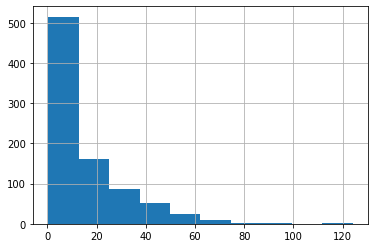

In [ ]:
df_total['proporcao_beneficiarios'].hist();

In [ ]:
df_total.sort_values(by='proporcao_beneficiarios', ascending=False).head()

,id_municipio,uf,regiao_intermediaria,regiao_imediata,mesorregiao,microrregiao,nome_municipio,qtde,pop_total,pop_media,pop_mediana,pop_std,qtde_beneficiarios,qtde_operadoras,qtde_datas,min_data,max_data,_merge,proporcao_beneficiarios
2523,312510,Minas Gerais,Pouso Alegre,Pouso Alegre,Sul/Sudoeste de Minas,Pouso Alegre,Extrema,34,37649,1107.323529,1192.5,437.285547,46718.0,108.0,204.0,1999-10,2022-04,both,124.088289
3002,316460,Minas Gerais,Divinópolis,Divinópolis,Oeste de Minas,Divinópolis,São Sebastião do Oeste,34,6948,204.352941,218.5,77.679170,6570.0,30.0,187.0,2000-01,2022-04,both,94.559585
2763,314480,Minas Gerais,Belo Horizonte,Belo Horizonte,Metropolitana de Belo Horizonte,Belo Horizonte,Nova Lima,34,97378,2864.058824,2999.5,1043.765065,89444.0,201.0,265.0,1999-10,2022-04,both,91.852369
2442,311800,Minas Gerais,Barbacena,Conselheiro Lafaiete,Metropolitana de Belo Horizonte,Conselheiro Lafaiete,Congonhas,34,55836,1642.235294,1775.0,629.992451,44361.0,107.0,263.0,1999-10,2022-04,both,79.448743
2309,310620,Minas Gerais,Belo Horizonte,Belo Horizonte,Metropolitana de Belo Horizonte,Belo Horizonte,Belo Horizonte,34,2530701,74432.382353,75804.5,23502.049610,1911202.0,480.0,269.0,1999-10,2022-04,both,75.520656


In [ ]:
cols = [
    'id_municipio', 'uf', 'nome_municipio', 'regiao_intermediaria', 'regiao_imediata', 'mesorregiao', 'microrregiao',
    'pop_total', 'qtde_beneficiarios', 'qtde_operadoras', 'proporcao_beneficiarios'
]
df_filtrado = df_total[cols].query("pop_total >= 50000").sort_values(by='proporcao_beneficiarios', ascending=False)
df_filtrado.head()

,id_municipio,uf,nome_municipio,regiao_intermediaria,regiao_imediata,mesorregiao,microrregiao,pop_total,qtde_beneficiarios,qtde_operadoras,proporcao_beneficiarios
2763,314480,Minas Gerais,Nova Lima,Belo Horizonte,Belo Horizonte,Metropolitana de Belo Horizonte,Belo Horizonte,97378,89444.0,201.0,91.852369
2442,311800,Minas Gerais,Congonhas,Barbacena,Conselheiro Lafaiete,Metropolitana de Belo Horizonte,Conselheiro Lafaiete,55836,44361.0,107.0,79.448743
2309,310620,Minas Gerais,Belo Horizonte,Belo Horizonte,Belo Horizonte,Metropolitana de Belo Horizonte,Belo Horizonte,2530701,1911202.0,480.0,75.520656
2857,315250,Minas Gerais,Pouso Alegre,Pouso Alegre,Pouso Alegre,Sul/Sudoeste de Minas,Pouso Alegre,154293,105142.0,224.0,68.144375
2848,315180,Minas Gerais,Poços de Caldas,Pouso Alegre,Poços de Caldas,Sul/Sudoeste de Minas,Poços de Caldas,169838,115709.0,264.0,68.129041


In [ ]:
df_final = pd.merge(left=df_filtrado, right=df_estabelecimentos, how='left', on='id_municipio', indicator=True)
df_final.sort_values(by='qtde_estabelecimentos', ascending=False).head()

,id_municipio,uf,nome_municipio,regiao_intermediaria,regiao_imediata,mesorregiao,microrregiao,pop_total,qtde_beneficiarios,qtde_operadoras,proporcao_beneficiarios,qtde_estabelecimentos,qtde_tipos,_merge
2,310620,Minas Gerais,Belo Horizonte,Belo Horizonte,Belo Horizonte,Metropolitana de Belo Horizonte,Belo Horizonte,2530701,1911202.0,480.0,75.520656,5631,29,both
7,317020,Minas Gerais,Uberlândia,Uberlândia,Uberlândia,Triângulo Mineiro/Alto Paranaíba,Uberlândia,706597,454638.0,364.0,64.341909,2273,23,both
18,313670,Minas Gerais,Juiz de Fora,Juíz de Fora,Juiz de Fora,Zona da Mata,Juiz de Fora,577532,308375.0,319.0,53.395310,1614,28,both
5,312230,Minas Gerais,Divinópolis,Divinópolis,Divinópolis,Oeste de Minas,Divinópolis,242505,162913.0,202.0,67.179233,943,25,both
8,311860,Minas Gerais,Contagem,Belo Horizonte,Belo Horizonte,Metropolitana de Belo Horizonte,Belo Horizonte,673849,426268.0,311.0,63.258683,884,23,both


In [ ]:
df_final['mesorregiao'].value_counts(dropna=False)

Metropolitana de Belo Horizonte     21
Sul/Sudoeste de Minas               10
Zona da Mata                         8
Triângulo Mineiro/Alto Paranaíba     8
Norte de Minas                       6
Oeste de Minas                       5
Vale do Rio Doce                     5
Central Mineira                      3
Campo das Vertentes                  3
Noroeste de Minas                    2
Vale do Mucuri                       1
Name: mesorregiao, dtype: int64

In [ ]:
df_final['_merge'].value_counts(dropna=False)

both          72
left_only      0
right_only     0
Name: _merge, dtype: int64

In [ ]:
df_final['cidadao_por_hospital'] = df_final['pop_total'] / df_final['qtde_estabelecimentos']
df_final['beneficiario_por_hospital'] = df_final['qtde_beneficiarios'] / df_final['qtde_estabelecimentos']
df_final.head()

,id_municipio,uf,nome_municipio,regiao_intermediaria,regiao_imediata,mesorregiao,microrregiao,pop_total,qtde_beneficiarios,qtde_operadoras,proporcao_beneficiarios,qtde_estabelecimentos,qtde_tipos,_merge,cidadao_por_hospital,beneficiario_por_hospital
0,314480,Minas Gerais,Nova Lima,Belo Horizonte,Belo Horizonte,Metropolitana de Belo Horizonte,Belo Horizonte,97378,89444.0,201.0,91.852369,258,16,both,377.434109,346.682171
1,311800,Minas Gerais,Congonhas,Barbacena,Conselheiro Lafaiete,Metropolitana de Belo Horizonte,Conselheiro Lafaiete,55836,44361.0,107.0,79.448743,149,13,both,374.738255,297.724832
2,310620,Minas Gerais,Belo Horizonte,Belo Horizonte,Belo Horizonte,Metropolitana de Belo Horizonte,Belo Horizonte,2530701,1911202.0,480.0,75.520656,5631,29,both,449.423015,339.407210
3,315250,Minas Gerais,Pouso Alegre,Pouso Alegre,Pouso Alegre,Sul/Sudoeste de Minas,Pouso Alegre,154293,105142.0,224.0,68.144375,776,19,both,198.831186,135.492268
4,315180,Minas Gerais,Poços de Caldas,Pouso Alegre,Poços de Caldas,Sul/Sudoeste de Minas,Poços de Caldas,169838,115709.0,264.0,68.129041,845,21,both,200.991716,136.933728


In [ ]:
cols = [
    'id_municipio', 'regiao_intermediaria', 'regiao_imediata', 'mesorregiao', 'microrregiao',
    'nome_municipio', 'pop_total', 'qtde_beneficiarios', 'qtde_operadoras', 'proporcao_beneficiarios',
    'qtde_estabelecimentos', 'cidadao_por_hospital', 'beneficiario_por_hospital'
]
df_final = df_final[cols].sort_values(by='cidadao_por_hospital', ascending=False)
df_final.head()

,id_municipio,regiao_intermediaria,regiao_imediata,mesorregiao,microrregiao,nome_municipio,pop_total,qtde_beneficiarios,qtde_operadoras,proporcao_beneficiarios,qtde_estabelecimentos,cidadao_por_hospital,beneficiario_por_hospital
50,315460,Belo Horizonte,Belo Horizonte,Metropolitana de Belo Horizonte,Belo Horizonte,Ribeirão das Neves,341415,103719.0,181.0,30.379157,150,2276.100000,691.460000
34,312980,Belo Horizonte,Belo Horizonte,Metropolitana de Belo Horizonte,Belo Horizonte,Ibirité,184030,71672.0,159.0,38.945824,86,2139.883721,833.395349
26,315670,Belo Horizonte,Belo Horizonte,Metropolitana de Belo Horizonte,Belo Horizonte,Sabará,137877,59480.0,171.0,43.139900,88,1566.784091,675.909091
56,312410,Belo Horizonte,Belo Horizonte,Metropolitana de Belo Horizonte,Belo Horizonte,Esmeraldas,72512,20012.0,113.0,27.598191,59,1229.016949,339.186441
31,315780,Belo Horizonte,Belo Horizonte,Metropolitana de Belo Horizonte,Belo Horizonte,Santa Luzia,221705,90093.0,176.0,40.636431,182,1218.159341,495.016484


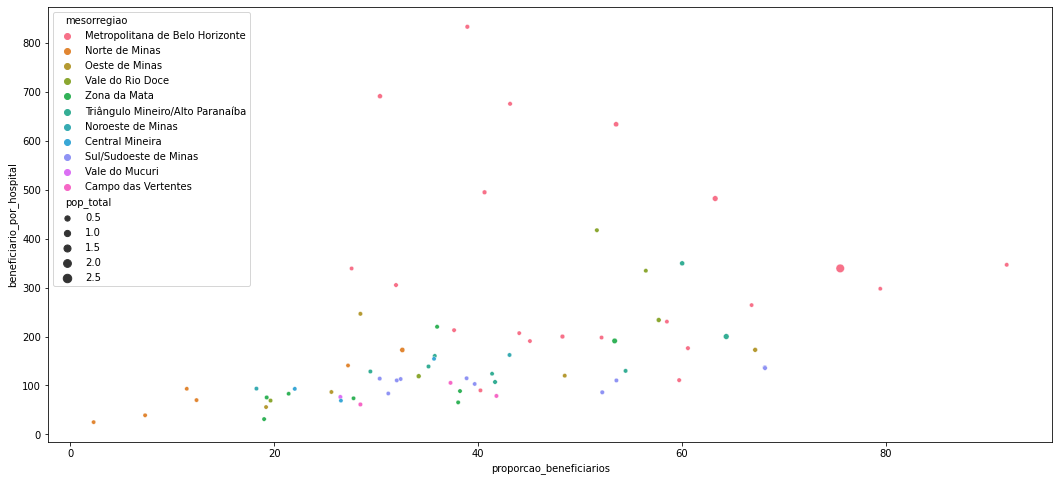

In [ ]:
plt.figure(figsize=(18,8))
sns.scatterplot(df_final['proporcao_beneficiarios'], df_final['beneficiario_por_hospital'], size=df_final['pop_total'], hue=df_final['mesorregiao']);
plt.show()

In [ ]:
df_final.query("proporcao_beneficiarios >= 60 and proporcao_beneficiarios <= 80 and beneficiario_por_hospital >= 400 and beneficiario_por_hospital <= 500")

,id_municipio,nome_municipio,pop_total,qtde_beneficiarios,qtde_operadoras,proporcao_beneficiarios,qtde_estabelecimentos,cidadao_por_hospital,beneficiario_por_hospital
8,311860,Contagem,673849,426268.0,311.0,63.258683,884,762.272624,482.20362


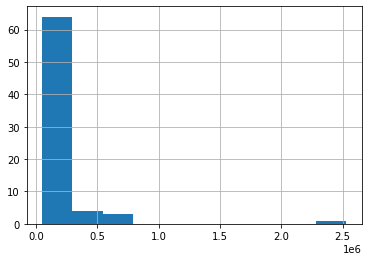

In [ ]:
df_final['pop_total'].hist();

In [ ]:
df_final.query("pop_total >= 1000000")

,id_municipio,nome_municipio,pop_total,qtde_beneficiarios,qtde_operadoras,proporcao_beneficiarios,qtde_estabelecimentos,cidadao_por_hospital,beneficiario_por_hospital
2,310620,Belo Horizonte,2530701,1911202.0,480.0,75.520656,5631,449.423015,339.40721


In [ ]:
df_final.query("nome_municipio == 'Contagem'")

,id_municipio,nome_municipio,pop_total,qtde_beneficiarios,qtde_operadoras,proporcao_beneficiarios,qtde_estabelecimentos,cidadao_por_hospital,beneficiario_por_hospital
8,311860,Contagem,673849,426268.0,311.0,63.258683,884,762.272624,482.20362


In [ ]:
df_final.query("cidadao_por_hospital > 450").sort_values('cidadao_por_hospital', ascending=False)

,id_municipio,nome_municipio,pop_total,qtde_beneficiarios,qtde_operadoras,proporcao_beneficiarios,qtde_estabelecimentos,cidadao_por_hospital,beneficiario_por_hospital
50,315460,Ribeirão das Neves,341415,103719.0,181.0,30.379157,150,2276.100000,691.460000
34,312980,Ibirité,184030,71672.0,159.0,38.945824,86,2139.883721,833.395349
26,315670,Sabará,137877,59480.0,171.0,43.139900,88,1566.784091,675.909091
56,312410,Esmeraldas,72512,20012.0,113.0,27.598191,59,1229.016949,339.186441
31,315780,Santa Luzia,221705,90093.0,176.0,40.636431,182,1218.159341,495.016484
17,310670,Betim,450024,240938.0,227.0,53.538922,380,1184.273684,634.047368
71,316110,São Francisco,56625,1299.0,55.0,2.294040,52,1088.942308,24.980769
48,317120,Vespasiano,131849,42127.0,144.0,31.950944,138,955.427536,305.268116
53,314520,Nova Serrana,108241,30804.0,71.0,28.458717,125,865.928000,246.432000
69,310730,Bocaiúva,50521,5775.0,80.0,11.430890,62,814.854839,93.145161


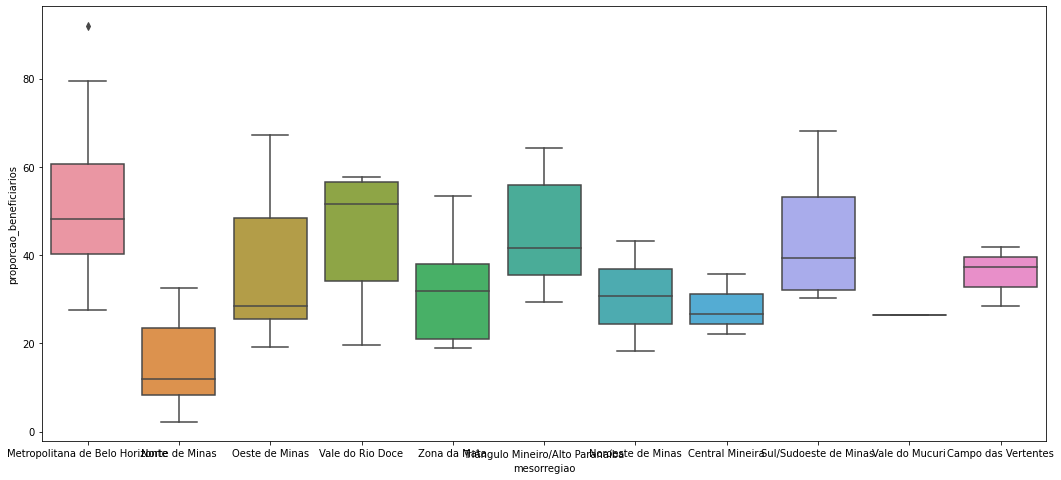

In [ ]:
plt.figure(figsize=(18,8))
sns.boxplot(data=df_final, y='proporcao_beneficiarios', x='mesorregiao');
plt.show()

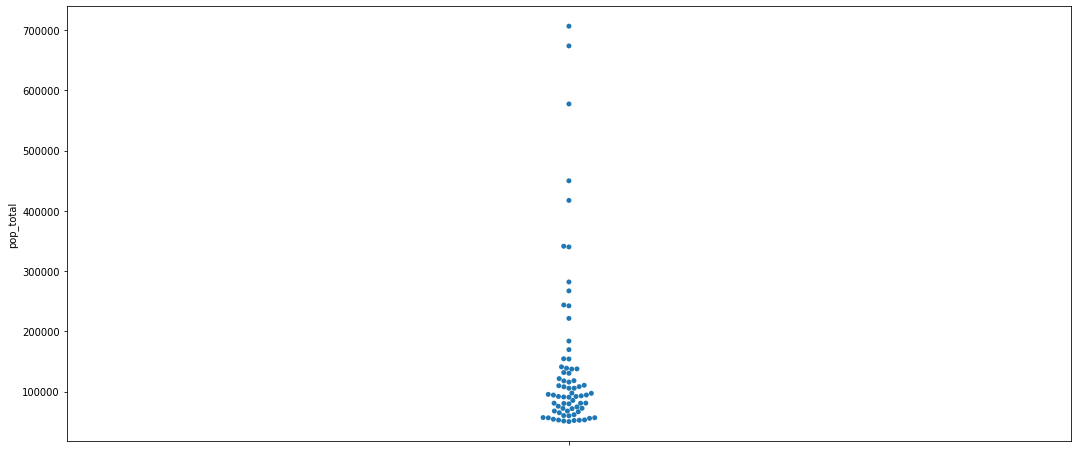

In [ ]:
plt.figure(figsize=(18,8))
sns.swarmplot(data=df_final.query("pop_total < 1000000"), y='pop_total'); #, x='mesorregiao');
plt.show()

In [ ]:
px.scatter( df_final, x='qtde_operadoras', y='proporcao_beneficiarios', opacity=0.8,
            size='beneficiario_por_hospital', color='mesorregiao', hover_name='nome_municipio',
            title='Situação dos Municípios de Minas Gerais em 2021',
            log_x=False , color_discrete_sequence=px.colors.qualitative.Dark24,
            #,size_max=60 , range_x=[0, 50], range_y=[25,41]
            labels=dict(
              proporcao_beneficiarios='Beneficiários (%)',
              mesorregiao='Mesorregião',
              qtde_operadoras='Quantidade de operadoras',
              beneficiario_por_hospital='Nº beneficiários a cada 1 hospital'
            )
          )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4161668 entries, 0 to 4161667
Data columns (total 11 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ano                   int64 
 1   id_municipio          int64 
 2   nome_municipio        object
 3   uf                    object
 4   regiao_intermediaria  object
 5   regiao_imediata       object
 6   mesorregiao           object
 7   microrregiao          object
 8   genero                object
 9   grupo_idade           object
 10  populacao             int64 
dtypes: int64(3), object(8)
memory usage: 381.0+ MB


In [ ]:
df['ano'].value_counts(dropna=False)

2021    189380
2020    189380
2019    189380
2018    189380
2017    189380
2016    189380
2015    189380
2014    189380
2013    189380
2012    189210
2011    189210
2010    189210
2009    189210
2008    189210
2007    189176
2006    189176
2005    189176
2004    189176
2002    189176
2001    189040
2003    189040
2000    187238
Name: ano, dtype: int64

In [ ]:
df_group = df.query("ano == 2021").groupby(by=['id_municipio'], as_index=False).agg({
    'populacao': ['count', 'sum', 'mean', 'median', 'std']
})

df_group.columns = df_group.columns.droplevel(0)
df_group.columns = ['id_municipio', 'qtde', 'pop_total', 'pop_media', 'pop_mediana', 'pop_std']

df_group

,id_municipio,qtde,pop_total,pop_media,pop_mediana,pop_std
0,1100015,34,22516,662.235294,776.0,261.806204
1,1100023,34,111148,3269.058824,3999.5,1582.087553
2,1100031,34,5067,149.029412,169.5,56.514672
3,1100049,34,86416,2541.647059,2952.5,1065.283342
4,1100056,34,16088,473.176471,540.0,186.194013
...,...,...,...,...,...,...
5565,5222005,34,14088,414.352941,474.5,157.153251
5566,5222054,34,9002,264.764706,317.5,119.556265
5567,5222203,34,6451,189.735294,210.5,118.779222
5568,5222302,34,5941,174.735294,198.5,62.436542


In [ ]:
pd.pivot_table(df, values='populacao', index=['id_municipio'],
                    columns=['genero', 'grupo_idade'], aggfunc=np.sum).reset_index()

genero      id_municipio feminino                                              \
grupo_idade              0-4 anos 10-14 anos 15-19 anos 20-24 anos 25-29 anos   
0                1100015    22861      25561      25456      24155      22825   
1                1100023    88210      99947     102278      99541      95328   
2                1100031     6172       6140       6077       5633       5263   
3                1100049    69623      80856      84184      83890      81515   
4                1100056    14726      17317      17733      17181      16491   
...                  ...      ...        ...        ...        ...        ...   
5565             5222005    10680      11587      11796      12129      12160   
5566             5222054     6949       6736       6851       7022       7011   
5567             5222203     5362       4951       5000       4784       4454   
5568             5222302     4724       5001       4792       4502       4253   
5569             5300108  2229408    2300017    2532050    2823668    2904440   

genero                                                   ...  masculino  \
grupo_idade 30-34 anos 35-39 anos 40-44 anos 45-49 anos  ... 40-44 anos   
0                21309      19661      17563      15148  ...      19021   
1                89415      80455      68768      57286  ...      70192   
2                 5147       4974       4633       4230  ...       5077   
3                77020      70816      63036      53979  ...      60922   
4                15670      14763      13318      11569  ...      13034   
...                ...        ...        ...        ...  ...        ...   
5565             11835      11457      10313       8775  ...      10663   
5566              6934       6473       5806       5100  ...       6605   
5567              4086       3522       2906       2461  ...       3986   
5568              3971       4032       3727       3534  ...       4327   
5569           2822295    2620341    2273985    1905153  ...    2005885   

genero                                                                       \
grupo_idade 45-49 anos 5-9 anos 50-54 anos 55-59 anos 60-64 anos 65-69 anos   
0                16999    25612      14343      11510       8877       6759   
1                59693    96373      48536      36893      27575      19788   
2                 4752     6205       4205       3478       2827       2010   
3                52779    76999      43948      34419      26045      19214   
4                11563    16646       9908       8021       6326       4873   
...                ...      ...        ...        ...        ...        ...   
5565              9161    11502       7764       6191       4732       3611   
5566              5663     7091       4609       3540       2589       1999   
5567              2943     5427       2400       1894       1372        982   
5568              4064     5086       3723       3273       2658       1916   
5569           1656738  2302161    1337778    1014906     744502     536238   

genero                                     
grupo_idade 70-74 anos 75-79 anos 80-mais  
0                 4808       3124    2397  
1                13528       8456    7430  
2                 1421        845     703  
3                13562       8938    8894  
4                 3609       2449    2142  
...                ...        ...     ...  
5565              2668       1728    1739  
5566              1394        829     841  
5567               673        408     339  
5568              1299        725     626  
5569            355210     221914  198962  

[5570 rows x 35 columns]

In [ ]:
df_plano_saude = pd.read_csv(f'{drive_path}/sib_202203_MG.csv', sep=';', encoding='ISO-8859-1')
df_plano_saude.head()

,ID_TEMPO_COMPETENCIA,CD_OPERADORA,DT_INCLUSAO,CD_BENE_MOTV_INCLUSAO,IND_PORTABILIDADE,ID_MOTIVO_MOVIMENTO,LG_BENEFICIARIO_ATIVO,DT_NASCIMENTO,TP_SEXO,CD_PLANO_RPS,...,CD_MUNICIPIO,SG_UF,LG_RESIDE_EXTERIOR,DT_REATIVACAO,DT_ULTIMA_REATIVACAO,DT_ULTIMA_MUDA_CONTRATUAL,DT_CANCELAMENTO,DT_ULTIMO_CANCELAMENTO,CD_BENE_MOTIV_CANCELAMENTO,DT_CARGA
0,202203,309401,1999-11,NaN,NAO,NaN,1,1947.0,F,423317994.0,...,312770,MG,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-05
1,202203,309401,2002-04,NaN,NAO,NaN,1,1938.0,F,NaN,...,312770,MG,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-05
2,202203,309401,1999-12,NaN,NAO,NaN,1,1948.0,F,NaN,...,312770,MG,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-05
3,202203,309401,1999-12,NaN,NAO,22.0,1,1954.0,F,NaN,...,312770,MG,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-05
4,202203,309401,2000-11,NaN,NAO,74.0,1,1962.0,M,417021991.0,...,312770,MG,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-05


In [ ]:
df_plano_saude.shape

(8063613, 27)

In [ ]:
df_plano_saude.columns

Index(['ID_TEMPO_COMPETENCIA', 'CD_OPERADORA', 'DT_INCLUSAO',
       'CD_BENE_MOTV_INCLUSAO', 'IND_PORTABILIDADE', 'ID_MOTIVO_MOVIMENTO',
       'LG_BENEFICIARIO_ATIVO', 'DT_NASCIMENTO', 'TP_SEXO', 'CD_PLANO_RPS',
       'CD_PLANO_SCPA', 'NR_PLANO_PORTABILIDADE', 'DT_PRIMEIRA_CONTRATACAO',
       'DT_CONTRATACAO', 'ID_BENE_TIPO_DEPENDENTE', 'LG_COBERTURA_PARCIAL',
       'LG_ITEM_EXCLUIDO_COBERTURA', 'CD_MUNICIPIO', 'SG_UF',
       'LG_RESIDE_EXTERIOR', 'DT_REATIVACAO', 'DT_ULTIMA_REATIVACAO',
       'DT_ULTIMA_MUDA_CONTRATUAL', 'DT_CANCELAMENTO',
       'DT_ULTIMO_CANCELAMENTO', 'CD_BENE_MOTIV_CANCELAMENTO', 'DT_CARGA'],
      dtype='object')

In [ ]:
df_plano_saude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8063613 entries, 0 to 8063612
Data columns (total 27 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   ID_TEMPO_COMPETENCIA        int64  
 1   CD_OPERADORA                int64  
 2   DT_INCLUSAO                 object 
 3   CD_BENE_MOTV_INCLUSAO       float64
 4   IND_PORTABILIDADE           object 
 5   ID_MOTIVO_MOVIMENTO         float64
 6   LG_BENEFICIARIO_ATIVO       int64  
 7   DT_NASCIMENTO               float64
 8   TP_SEXO                     object 
 9   CD_PLANO_RPS                float64
 10  CD_PLANO_SCPA               object 
 11  NR_PLANO_PORTABILIDADE      float64
 12  DT_PRIMEIRA_CONTRATACAO     object 
 13  DT_CONTRATACAO              object 
 14  ID_BENE_TIPO_DEPENDENTE     float64
 15  LG_COBERTURA_PARCIAL        float64
 16  LG_ITEM_EXCLUIDO_COBERTURA  float64
 17  CD_MUNICIPIO                int64  
 18  SG_UF                       object 
 19  LG_RESIDE_EXTERIOR   

In [ ]:
df_plano_saude['CD_MUNICIPIO'].value_counts(dropna=False)

310620    1911202
317020     454638
311860     426268
313670     308375
310670     240938
           ...   
316265         29
311547         28
311115         27
313925         27
312695         17
Name: CD_MUNICIPIO, Length: 854, dtype: int64

In [ ]:
df_plano_saude['LG_BENEFICIARIO_ATIVO'].value_counts(dropna=False)

1    8063613
Name: LG_BENEFICIARIO_ATIVO, dtype: int64

In [ ]:
df_plano_saude['TP_SEXO'].value_counts(dropna=False, normalize=True)

F    0.50951
M    0.49049
Name: TP_SEXO, dtype: float64

In [ ]:
df_plano_saude['DT_INCLUSAO'].value_counts(dropna=False, normalize=True)

2021-10    3.651651e-02
2022-01    3.258539e-02
2022-03    3.017816e-02
2022-04    3.000243e-02
2022-02    2.897671e-02
               ...     
2000-03    1.061559e-04
2003-02    9.338246e-05
2000-05    5.419407e-05
2000-02    4.278479e-05
1999-01    1.240139e-07
Name: DT_INCLUSAO, Length: 270, dtype: float64

In [ ]:
df_beneficiarios = df_plano_saude.groupby(by=['CD_MUNICIPIO'], as_index=False).agg({
    'CD_OPERADORA': ['count', 'nunique'],
    'DT_INCLUSAO': ['nunique', 'min', 'max']
})

df_beneficiarios.columns = df_beneficiarios.columns.droplevel(0)
df_beneficiarios.columns = ['id_municipio', 'qtde_beneficiarios', 'qtde_operadoras', 'qtde_datas', 'min_data', 'max_data']

df_beneficiarios

,id_municipio,qtde_beneficiarios,qtde_operadoras,qtde_datas,min_data,max_data
0,310000,690,52,99,1999-10,2022-03
1,310010,2135,73,142,1999-12,2022-04
2,310020,4325,67,215,1999-10,2022-04
3,310030,1025,55,166,1999-11,2022-04
4,310040,437,29,83,1999-10,2022-04
...,...,...,...,...,...,...
849,317180,1237,49,185,1999-11,2022-04
850,317190,241,23,98,2000-01,2022-04
851,317200,9216,77,247,1999-10,2022-04
852,317210,634,44,139,1999-11,2022-04


In [ ]:
df_plano_saude.groupby(by=['CD_MUNICIPIO', 'TP_SEXO'], as_index=False).agg({
    'CD_OPERADORA': ['count', 'nunique'],
    'DT_INCLUSAO': ['nunique', 'min', 'max']
})

CD_MUNICIPIO TP_SEXO CD_OPERADORA         DT_INCLUSAO                  
                                 count nunique     nunique      min      max
0          310000       F          360      31          72  1999-10  2022-02
1          310000       M          330      44          84  1999-10  2022-03
2          310010       F          964      66         118  1999-12  2022-04
3          310010       M         1171      60         123  1999-12  2022-04
4          310020       F         2260      58         196  1999-10  2022-04
...           ...     ...          ...     ...         ...      ...      ...
1703       317200       M         4483      66         222  1999-10  2022-04
1704       317210       F          319      34         116  1999-11  2022-04
1705       317210       M          315      37         101  1999-11  2022-04
1706       317220       F          196      31          83  2000-10  2022-04
1707       317220       M          206      34          76  2000-10  2022-04

[1708 rows x 7 columns]

In [ ]:
df_group = df.groupby(by=['ano', 'mesorregiao',	'uf'], as_index=False).agg({
    'sexo': ['nunique'],
    'nome_municipio': ['nunique'],
    'grupo_idade': ['nunique'],
    'populacao': ['count', 'sum', 'mean', 'median', 'std']
})

df_group.columns = df_group.columns.droplevel(0)
df_group.columns = ['ano', 'mesorregiao', 'uf', 'qtde_genero', 'qtde_municipios', 'qtde_grupos_etarios', 'qtde', 'pop_total', 'pop_media', 'pop_mediana', 'pop_std']

df_group

,ano,mesorregiao,uf,qtde_genero,qtde_municipios,qtde_grupos_etarios,qtde,pop_total,pop_media,pop_mediana,pop_std
0,2000,Agreste Alagoano,Alagoas,2,24,17,816,594120.0,728.088235,329.5,1405.003378
1,2000,Agreste Paraibano,Paraíba,2,66,17,2244,1180347.0,526.001337,241.0,1519.929205
2,2000,Agreste Pernambucano,Pernambuco,2,71,17,2414,2043371.0,846.466860,493.0,1261.871682
3,2000,Agreste Potiguar,Rio Grande do Norte,2,42,17,1428,398151.0,278.817227,173.0,319.166316
4,2000,Agreste Sergipano,Sergipe,2,18,17,612,415143.0,678.338235,332.0,934.562913
...,...,...,...,...,...,...,...,...,...,...,...
117,2000,Vale do Juruá,Acre,2,8,17,272,171364.0,630.014706,256.5,1006.935353
118,2000,Vale do Mucuri,Minas Gerais,2,23,17,782,390525.0,499.392583,234.0,926.036840
119,2000,Vale do Paraíba Paulista,São Paulo,2,39,17,1326,2028710.0,1529.947210,373.0,3400.315229
120,2000,Vale do Rio Doce,Minas Gerais,2,102,17,3468,1573719.0,453.782872,181.5,1205.497064


In [ ]:
df_group = df.groupby(by=['ano', 'id_municipio', 'nome_municipio',	'uf'], as_index=False).agg({
    'sexo': ['nunique'],
    'grupo_idade': ['nunique'],
    'populacao': ['count', 'sum', 'mean', 'median', 'std']
})

df_group.columns = df_group.columns.droplevel(0)
df_group.columns = ['ano', 'id', 'nome_municipio', 'uf', 'qtde_genero', 'qtde_grupos_etarios', 'qtde', 'pop_total', 'pop_media', 'pop_mediana', 'pop_std']

df_group

,ano,id,nome_municipio,uf,qtde_genero,qtde_grupos_etarios,qtde,pop_total,pop_media,pop_mediana,pop_std
0,2000,1100015,Alta Floresta D'Oeste,Rondônia,2,17,34,27095.0,796.911765,765.0,574.428800
1,2000,1100023,Ariquemes,Rondônia,2,17,34,76081.0,2237.676471,2159.0,1636.560875
2,2000,1100031,Cabixi,Rondônia,2,17,34,7677.0,225.794118,219.5,148.954901
3,2000,1100049,Cacoal,Rondônia,2,17,34,75127.0,2209.617647,2247.5,1521.997890
4,2000,1100056,Cerejeiras,Rondônia,2,17,34,18593.0,546.852941,543.5,360.996528
...,...,...,...,...,...,...,...,...,...,...,...
108952,2019,3305802,Teresópolis,Rio de Janeiro,2,17,34,182594.0,5370.411765,5719.5,1623.071427
108953,2019,3305901,Trajano de Moraes,Rio de Janeiro,2,17,34,10626.0,312.529412,345.5,85.814541
108954,2019,3306008,Três Rios,Rio de Janeiro,2,17,34,81804.0,2406.000000,2707.5,759.099706
108955,2019,3306107,Valença,Rio de Janeiro,2,17,34,76523.0,2250.676471,2414.0,583.860440


In [ ]:
pd.pivot_table(df.query("id_municipio == 3170107"), values='populacao', index=['nome_municipio', 'uf'],
                    columns=['ano'], aggfunc=np.sum).reset_index()#.drop('ano', axis=1)

ano,nome_municipio,uf,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Uberaba,Minas Gerais,258532.0,264119.0,278460.0,273954.0,278624.0,282762.0,286836.0,290580.0,...,301427.0,308846.0,308846.0,312482.0,316149.0,319898.0,323405.0,326834.0,330361.0,333783.0


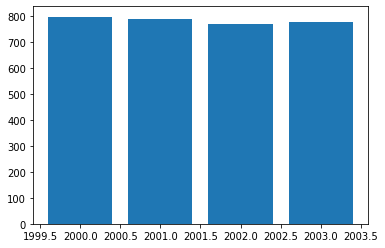

In [ ]:
id = '1100015'

df_temp = df_group.query(f"id == {id}")

plt.bar(x=df_temp['ano'], height=df_temp['pop_media']);
plt.show()

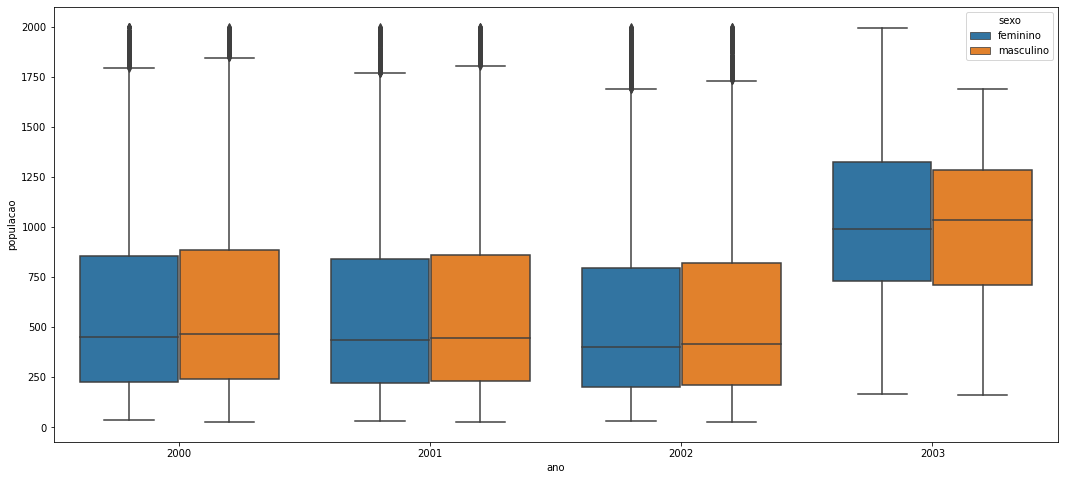

In [ ]:
plt.figure(figsize=(18,8))
sns.boxplot(data=df_populacao.query("grupo_idade == '0-4 anos' and populacao <= 2000 "), x='ano', y='populacao', hue='sexo');
plt.show()